In [1]:
#Scikit learn is a python library that is used to train model , preprocessing 
# it is called as father of machine learning


In [ ]:
# Importing all the library 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris
from IPython.display import display
import seaborn as sns


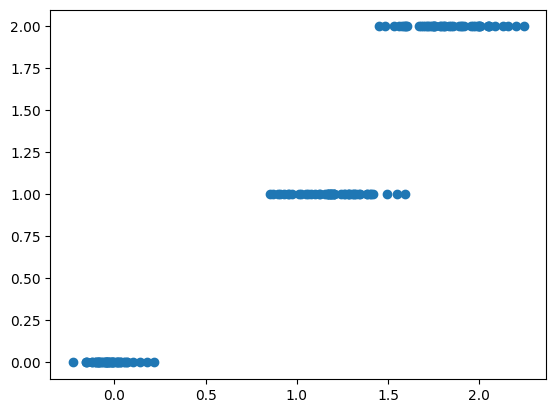

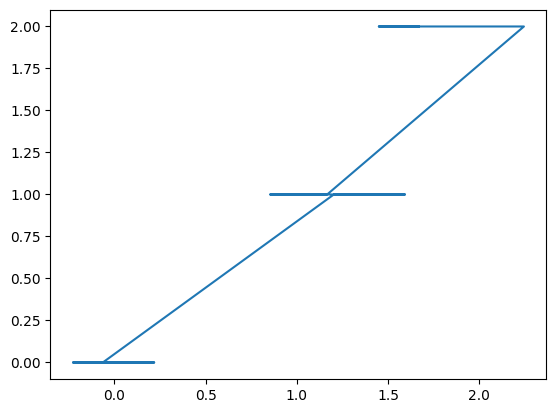

[-0. -0. -0.  0. -0.  0.  0. -0.  0. -0.]
[0 0 0 0 0 0 0 0 0 0]
Accuracy is 97.0 %


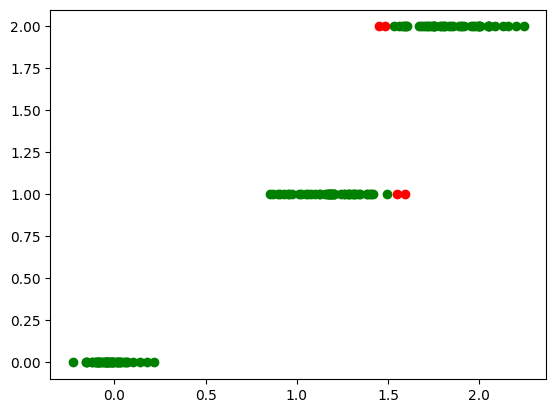

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


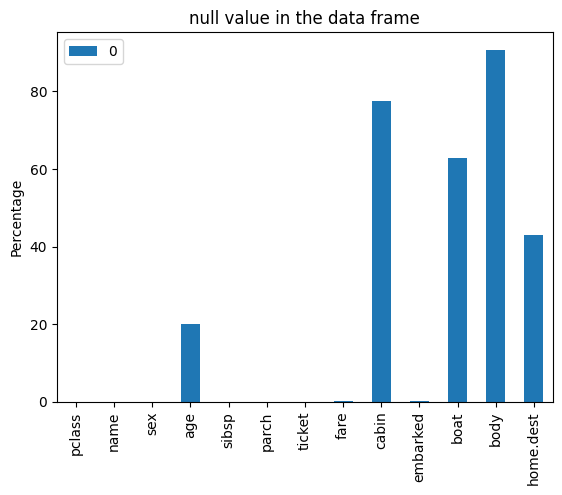

size of datafram: (1309, 13)
size of datafram: (1309, 12)
Number of null values befor imputation is : 263
Number of null values after imputation is : 0


In [20]:
load_iris()
# to see the input and output variable separetly
load_iris(return_X_y=True)

# lets understand with a sample model
x,y=load_iris(return_X_y=True)
from sklearn.linear_model import LinearRegression
Model=LinearRegression()
# this is the phase where the model is not learning anything
# untill we provide it a data set
Model =Model.fit(x,y)
Model.predict(x)

# checking the predicted data with output variable
# assigning the predicted value
pred=Model.predict(x)
plt.scatter(pred,y) # predicted value as pred and output as y
plt.show()
plt.plot(pred,y)
plt.show()

# Diving deep into this 
rounded_pred=np.round(pred) # it will round the float value to integer

# By Value Identification
print(rounded_pred[:10])
print(y[:10])
# Calculate Accuracy
accuracy=(np.mean(rounded_pred==y))*100
print(f"Accuracy is {np.round(accuracy)} %")
# Visually identification
correct=rounded_pred==y
plt.scatter(pred[correct],y[correct],color="g",label="Correct prediction")
plt.scatter(pred[~correct],y[~correct],color="r",label="False prediction")
plt.show()

# Data cleaning and preprocessing
from sklearn.datasets import fetch_openml
df=fetch_openml("titanic",version=1,as_frame=True)['data']
display(df)
df.isnull().sum() # there is alot of null values in the data frame so we will try to visualize them in Graph using seaborn
null_value_in_per= pd.DataFrame((df.isnull().sum()/len(df))*100) # previously we calculated the percentage using the np but there was boolean operator for comparison but its not possible here
null_value_in_per.plot(kind='bar',title="null value in the data frame",ylabel="Percentage")
plt.legend()
plt.show()

#In the body column there is alot of null value
print(f"size of datafram: {df.shape}")
df.drop(['body'],axis=1,inplace=True)
print(f"size of datafram: {df.shape}")

# Value Imputation
"""
deleting feature(column) are not favoured since by eliminatinig a column we loose a feature that could contribute to outputs.
And this could cause generalized error.

"""
# to perform imputation we will import a lib
from sklearn.impute import SimpleImputer
print(f"Number of null values befor imputation is : {df.age.isnull().sum()}")
imp=SimpleImputer(strategy='mean')
df['age']=imp.fit_transform(df[['age']])
print(f"Number of null values after imputation is : {df.age.isnull().sum()}")
